## Project Title:

### An Investigation into Factors Affecting People's Income Range Using Python
#### Data Used: Census Income data

### Introduction
- Business and government decision-making is something that is core to the daily operations. As such, the adoption of the proper tools that can suport better decision-making and improve operations in businesses and government entities is vital.
- In meeting this goal, statistics is one of the useful teachniques that makes it possible to examine data, and make reliable conclusions that can support operational success.
- As part of the Udacity program, this report focuses on the **census income data**, which is taken through an in-depth statistical process, with the reliance on Python programming language and **Jupyter Notebook**, as part of the **Anaconda Ecosystem**.
- With the dataset selected comprising different variables, i.e., 15 in total, this research will only focus on some of the chosen numeric variables, relative to the below research and hypotheis for complete data analysis.


### Aims/Objectives

1. By the end of the analysis, the report aims to document correlation(association) numerical variables
2. By the end of the analysis, the report will document which of the chosen variables has the major effect
3. By the end of the analysis, the report will visualize key variables and their proportion in the census dataset

- Hence, with the data comprising 15 variables, the numerical variables are
- i. age
- ii. fnlwgt
- iii. education-num
- iv. capital-gain
- v. capital-loss
- vi. hours-per-week

### Research Question and Hypotheses

#### Research Question
- Is there an correlation between numeric variables in the census dataset?
- What is the direction of the correlation across the numeric variables, if it exists?
- What are the major descriptive statistics information across the key variables?
#### Hypotheses
- Null ===>         H0: No statistical correlation association exists between respective numerical variables
- Alternative ====> Ha: Statistical Corelation association exists between respective numerical variables

### Data Preparation

- To fully examine the data, and make desired conclusions, using the different preparation techniques becomes necessary
- The below steps makes this process possible

In [1]:
# Importing and Getting an overview of the dataset
import pandas as pd
income = pd.read_csv(r"C:\Users\User\Documents\Udacity\census_income.csv")
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-range
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


- As shown from data frame above, the census has 15 variables, as listed below, using tuple() method:

In [83]:
variable_list = tuple(income)
for i in variable_list:
    print(i)

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
income-range


- To allow for easier dataset analysis, below we adopt the dataframe.info() method to have a better outlook
- Also, since the focus of this report is correlation, (I) chose age and sex, to illustrate key data preparation elements
- First, to clean the data, the isnull() method is used to check if there are any null items

In [10]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32525 non-null  float64
 1   workclass       32521 non-null  object 
 2   fnlwgt          32554 non-null  float64
 3   education       32555 non-null  object 
 4   education-num   32559 non-null  float64
 5   marital-status  32548 non-null  object 
 6   occupation      32552 non-null  object 
 7   relationship    32556 non-null  object 
 8   race            32552 non-null  object 
 9   sex             32554 non-null  object 
 10  capital-gain    32556 non-null  float64
 11  capital-loss    32555 non-null  float64
 12  hours-per-week  32540 non-null  float64
 13  native-country  32555 non-null  object 
 14  income-range    32555 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [11]:
income.isnull().sum()

age               36
workclass         40
fnlwgt             7
education          6
education-num      2
marital-status    13
occupation         9
relationship       5
race               9
sex                7
capital-gain       5
capital-loss       6
hours-per-week    21
native-country     6
income-range       6
dtype: int64

- As shown from the summary above, for age variable, there are 36 null values and for sex, there are 7 null values
- To allow for quality analysis, the right data cleaning and preparation will be done on these two variables
- First, on (1) age variable and them on (2) sex variable

#### a. Data Cleaning on Age Variable
- To remove the null items, i.e., 35 of them, the null datapoints will be filled with the mean age from the total sample

In [15]:

age_mean = income['age'].mean()
age_mean

38.57847809377402

- From above, the mean of the age variable is 38.57847809377402
- This is what will be used to fill the null sections in the age column as shown below

In [25]:
import pandas as pd
income['age'].fillna(age_mean, inplace=True)

#### b. Data Cleaning on Sex Variable
- As shown from the isnull() method, there are 7 null items in the sex variable
- To remove the null items, i.e., 7 of them, the null datapoints will be filled with lowest category value
- First, to find out the smallest category between female and males, count method is used as below

In [27]:
income['sex'].value_counts()

 Male      21789
 Female    10765
Name: sex, dtype: int64

- From the summary above, male = 21789 and females = 10765. As a choice, the 7 null items will be filled with female
- This is as shown below

In [28]:
income['sex'].fillna('Female', inplace=True)

In [29]:
# Checking for any null values in the new dataset for the age and sex variables
income.isnull().sum()

age                0
workclass         40
fnlwgt             7
education          6
education-num      2
marital-status    13
occupation         9
relationship       5
race               9
sex                0
capital-gain       5
capital-loss       6
hours-per-week    21
native-country     6
income-range       6
dtype: int64

- As shown above, for our interest variables, i.e., Age and Sex, there are no null values anymore
- Now, the data can be analyzed for better interpretation and answering the research question

## Descriptive Statistics and Data Visualizations

- First, after replacing null items for the chosen variables (age and sex), descriptive statistics helps examine the data

#### 1. PART 1: NUMERICAL VARIABLES (CONTINUOUS VARIABLES)
- For the numerical variables, the describe() method helps give an overview of key descritive statistics
- This is as shown below, with little explanation following

In [30]:
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.255400e+04,32559.000000,32556.000000,32555.000000,32540.000000
mean,38.578478,1.897704e+05,10.080561,1077.814351,87.319920,40.436386
std,13.633581,1.055459e+05,2.572708,7385.847126,402.995608,12.344897
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783545e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370315e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Explanation of the Dataset's Tabulated Descritive Statistics
- From the table, of the sampled participants
1. On Age
- The mean age is 38.58 years (SD=13.64), with youngest person being 17 years and eldest 90 years
- On percentiles, 25% are below 28 years, and 50% below 37 years, while those in the 75% are 48 years.

2. On Education-num
- The mean is 10.08 (SD=2.57), with lowest 0.0000 and highest 99999
- On percentiles, 25%, 50% and 75% are zero(0) making these values irrelevant for meaningful interpretation

3. On Capital Loss
- The mean is 87.319920 (SD=402.996), with least  being 0.0000 and highest (max) being 4356.00

4. On Hours per week
- The average for the sample was 40.436386(SD=12.34), with minimum being 1 hour and maximum 99 hours
- On percentiles, the 25%, 50% and 75% were 40 hours, 40 hours and 45 hours respectively

#### 2. PART 2: NON-NUMERICAL VARIABLES (CATEGORICAL VARIABLES)

- To examine frequencies in the categorical variables, the counts() method and its associates can be used
- Other techniques will also be used, to summarize and visualize the dataset for the different variables

In [40]:
# Education
income['education'].value_counts()

 HS-grad         10498
 Some-college     7290
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1066
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

- As shown, it can be noted that most sample members were HS-grads (10498), then Some-college (7290), and Bachelors (5354)
- The least number being Preschool (51).
- The above can also be visualized as below, indicating that most participants were High school graduates (HS-grad)

<AxesSubplot:>

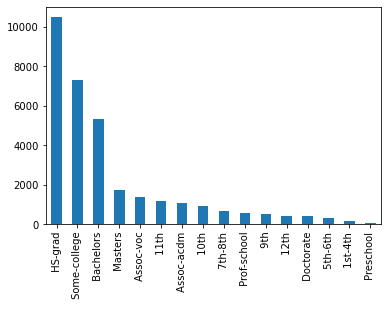

In [41]:
income['education'].value_counts().plot(kind='bar')

In [42]:
# Marital-status
income['marital-status'].value_counts()

 Married-civ-spouse       14969
 Never-married            10681
 Divorced                  4441
 Separated                 1024
 Widowed                    993
 Married-spouse-absent      417
 Married-AF-spouse           23
Name: marital-status, dtype: int64

- From the census data, most were the Married-civ-spouse (14969), and least members wre Married-AF-spouse (23)
- The bar chart below visualizes this differences

<AxesSubplot:ylabel='marital-status'>

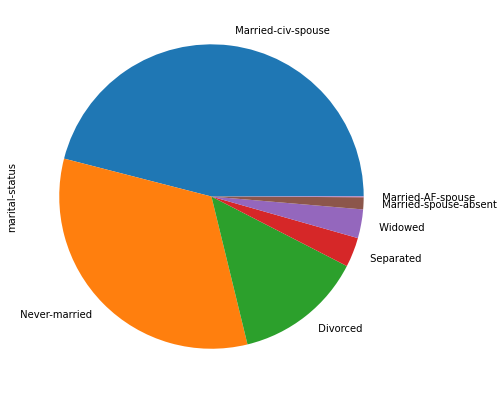

In [47]:
income['marital-status'].value_counts().plot(kind='pie', figsize=(7, 7))

In [48]:
# Occupation
income['occupation'].value_counts()

 Prof-specialty       4138
 Craft-repair         4098
 Exec-managerial      4064
 Adm-clerical         3770
 Sales                3648
 Other-service        3294
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       648
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

- For the census, the top-most 5 occupations were  Prof-specialty (4138), Craft-repair (4098), Exec-managerial (4064), Adm-clerical (3770) and Sales (3648)
- The least 2 occupation were Priv-house-serv (149) and Armed-Forces(9), also as visualized below

<AxesSubplot:>

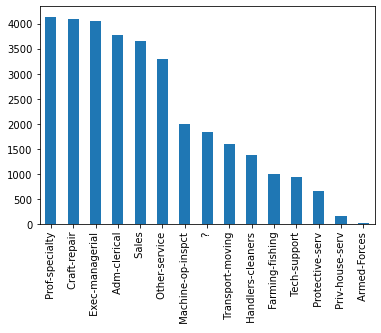

In [49]:
income['occupation'].value_counts().plot(kind='bar')

In [50]:
# Relationship
income['relationship'].value_counts()

 Husband           13191
 Not-in-family      8302
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

<AxesSubplot:ylabel='relationship'>

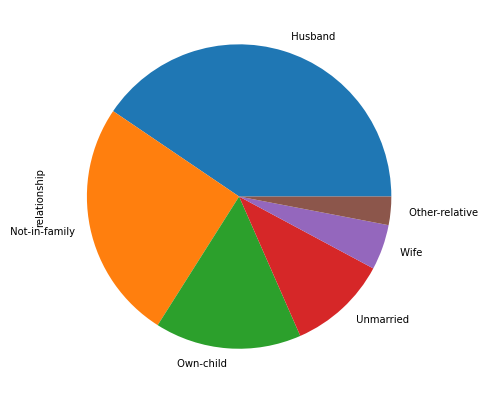

In [52]:
# Most member's relatioship was Husband (13191), with the least being Other-relative (981) as visualized below
income['relationship'].value_counts().plot(kind='pie', figsize=(7, 7))

In [34]:
# Race variable
income['race'].value_counts()

 White                 27809
 Black                  3122
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

- The data shows most members race was whites (27809) and least known American-Indian-Eskimo (311), with last Others (271).
- This can also be visualized using the chart below

<AxesSubplot:>

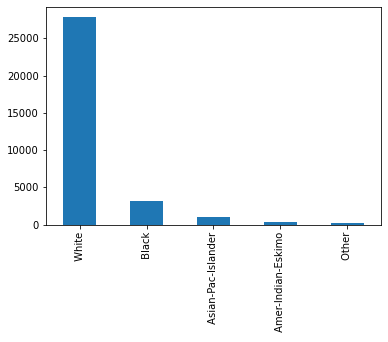

In [39]:
income['race'].value_counts().plot(kind='bar')

# The bar graph below confirms that for the sample, the majority were White

In [67]:
tuple(income)

('age',
 'workclass: ',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income-range')

# Data Analysis

- In order to answer the Research Question and Hypothesis listed in this report, inferential analysis is needed
- In this case, correlation (corr) analysis is used to examine the numerical variables and give insights on association
- The correlation results will also give the magnitude and direction of association (negative or positive correlation)

In [87]:
income.corr(method='kendall')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.052856,0.052915,0.101240,0.047859,0.108072
fnlwgt,-0.052856,1.000000,-0.025721,-0.004955,-0.005573,-0.015437
education-num,0.052915,-0.025721,1.000000,0.103587,0.065521,0.131902
capital-gain,0.101240,-0.004955,0.103587,1.000000,-0.064534,0.081127
capital-loss,0.047859,-0.005573,0.065521,-0.064534,1.000000,0.052520
hours-per-week,0.108072,-0.015437,0.131902,0.081127,0.052520,1.000000


### Discussion and Interpretation
- Correlation coefficient varies from -1 to +1 (Udacity, 2022; W3Schools, 2022).
- Thus, with this, the below interpretations can be made about the correlation among the variables

- age and fnlwgt have a negative, but weak correlation (-0.052856). Their scatter plot and trend line is almost flat
- age and education-num have a positive, but weak correlation (0.052915). Their scatter plot and trend line is almost flat
- age and capital-gain have a positive, but slightly weak correlation (0.101240).
- age and capital-loss have a positive, but weak correlation (0.047859). Their scatter plot and trend line is almost flat
- age and hours-per-week have a positive, but slightly weak correlation (0.108072).

- Another noticeable variable with much correlation is capital-gain and education-num at 0.103587
- Also, capital-gain and hours-per-week were positively correlated at 0.081127

- Hence, for variables with positive correlation, the rise in one has the impact of contributing to the increase in the other
- For example, if the people want more capital-gain, having more hours-per-week is necessary
- These two variables have a positive correlation

- Also, increase in capital-gain was directly associated with education-num (0.103587)

### Recommendation for Further Research

- In this report, the focus was only on numerical variables, for the inferential section
- Further research can carry out extra analysis covering categorical variables, e.g., sex, marital status and education

### Conclusion

- The examination of the census income offers useful information, that describes the population in which the dataset was collected from.
- Given the need in making better decisions for the improvement of community lives, the analysis has allowed the documentation of useful insights that can be used for business and government decision-making.
- As shown through the analysis, the census people had diverse traits and proportions as visualized on multiple factors.
- Also, using correlation method, it is shown that different numerical variables have varying association among them
- By conducting the descriptive analysis, and then the infrential statistics, useful insights are documented
- These ranged from age, sex, education to marital status and others

## References

- Lutes, J (2020). Correlation Is Simple With Seaborn And Pandas. MEDIUM. [link](https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e)
- Udacity (2022). UDACITY Data Analysis Nanodegree Notes and Lectures. [link](https://classroom.udacity.com/nanodegrees/nd002-alg-t2/dashboard/overview)
- W3Schools (2022). Pandas - Data Correlations. [link](https://www.w3schools.com/python/pandas/pandas_correlations.asp)
